# IPL Cricket Matches

    Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wg
wg.filterwarnings('ignore')
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf

In [3]:
from plotly.offline import iplot # to use plotly offline

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df = pd.read_csv('matches.csv', index_col = 'id', parse_dates = ['date'])
df.sample(5)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
408,2013,Delhi,2013-04-21,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,Feroz Shah Kotla,HDPK Dharmasena,S Ravi,NaN
537,2015,Visakhapatnam,2015-04-22,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,RK Illingworth,VA Kulkarni,NaN
575,2015,Ranchi,2015-05-22,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,3,A Nehra,JSCA International Stadium Complex,AK Chaudhary,CB Gaffaney,NaN
252,2011,Kochi,2011-04-18,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,normal,1,Kochi Tuskers Kerala,0,7,BB McCullum,Nehru Stadium,K Hariharan,AL Hill,NaN
211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,NaN


# Win and Lost team analysis

In [6]:
df.season.value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [7]:
df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [8]:
df.shape

(756, 17)

In [9]:
df.isna().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
df[df['result'] == 'tie']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
11146,2019,Delhi,2019-03-30,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon,Marais Erasmus
11342,2019,Mumbai,2019-02-05,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [11]:
df[df['result'] == 'no result']

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [12]:
winlost = df[['team1', 'team2', 'winner']]
winlost.head()

,team1,team2,winner
id,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


In [13]:
# creating a looser column
winlost['looser'] = winlost.apply(lambda x: (x['team2'] if x['team1'] == x['winner'] else x['team1']), axis = 'columns')
winlost.head()

,team1,team2,winner,looser
id,,,,
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore
2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Mumbai Indians
3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Gujarat Lions
4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Rising Pune Supergiant
5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils


In [14]:
wins = winlost['winner'].value_counts()
looser = winlost['looser'].value_counts()

In [15]:
wins.iplot(kind = 'bar',title='Winning Counts', xTitle='Teams', yTitle='Matches Won')

In [16]:
looser.iplot(kind = 'bar', title='Lost Counts', xTitle='Teams', yTitle='Matches Lost')

# MoM and Citywise Analysis

In [17]:
mom = df['player_of_match'].value_counts()
mom

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
SA Yadav           1
L Ngidi            1
JJ Roy             1
J Theron           1
JEC Franklin       1
Name: player_of_match, Length: 226, dtype: int64

In [18]:
# Top 20 man of match 
mom[:20].iplot(kind= 'bar', xTitle = 'Man of Match', yTitle = 'Number of Maches', title = 'Top 20 MoM')

# Matches hosted in each city

In [19]:
matches_in_cities = df['city'].value_counts()
matches_in_cities

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Abu Dhabi           7
Ranchi              7
Cape Town           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [20]:
matches_in_cities.iplot(kind = 'bar', xTitle = 'Cities', yTitle = 'Matches Counts', title = 'Matches Played in each city')

## Match Played at each stadium

In [21]:
stadium = df['venue'].value_counts()
stadium

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

In [22]:
# Top 20 stadiums with Maximum number of matches played
stadium[:20].iplot(kind ='bar', xTitle = 'Stadiums', yTitle = 'Count', title = 'Matches played at top 20 stadiums')

# MI vs CSK head to head

In [23]:
def get_micsk(team1, team2):
    teams = ['Chennai Super Kings', 'Mumbai Indians']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [24]:
index = []
for row in df.iterrows():
    flag = get_micsk(row[1]['team1'], row[1]['team2'])
    index.append(flag)  

In [25]:
sum(index)# times when the two teams faced together

28

In [26]:
micsk = df[index]
micsk.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,NaN
118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,NaN
162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,NaN
194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,NaN


In [27]:
micsk['toss_decision'].value_counts().iplot(kind = 'bar', xTitle = 'Toss Decision', yTitle = 'Counts')

In [28]:
micsk['toss_winner'].value_counts().iplot(kind = 'bar', xTitle = 'Team', yTitle = 'Counts', title = 'Number of Tosses Won')

In [29]:
micsk['winner'].value_counts().iplot(kind = 'bar', xTitle = 'Team', yTitle = 'Counts', title = 'Number of Matches won')

In [30]:
micsk['player_of_match'].value_counts().iplot(kind = 'bar', xTitle = 'Player Name', yTitle = 'Counts', title = 'Number of Times became MoM')

In [31]:
# Checking whether a team has won by wickets or runs
temp = micsk[['winner', 'win_by_runs', 'win_by_wickets']]
temp = temp.set_index('winner')
temp.head()

,win_by_runs,win_by_wickets
winner,,
Chennai Super Kings,6,0
Mumbai Indians,0,9
Mumbai Indians,19,0
Chennai Super Kings,0,7
Mumbai Indians,0,5


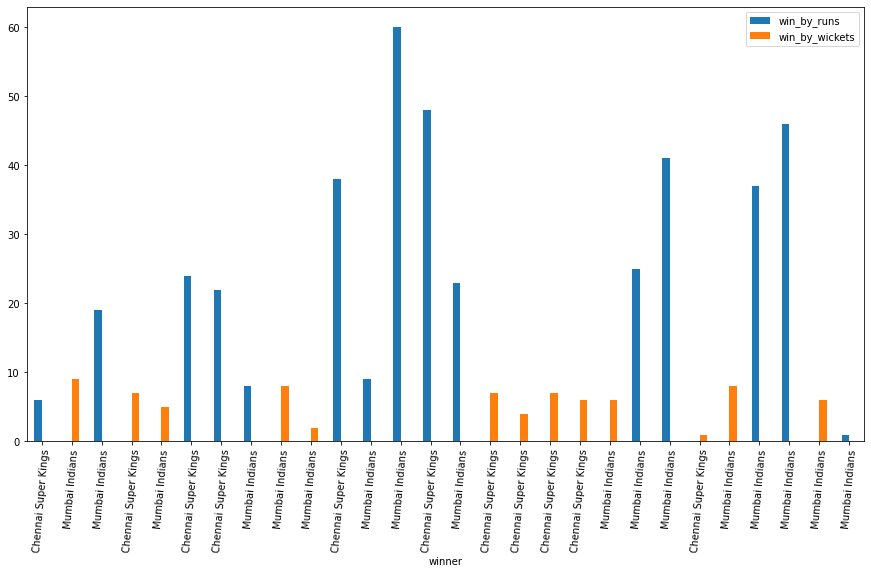

In [32]:
temp.plot.bar(figsize = (15,8), rot = 85)
plt.show()

# Seasonwise Match Summary

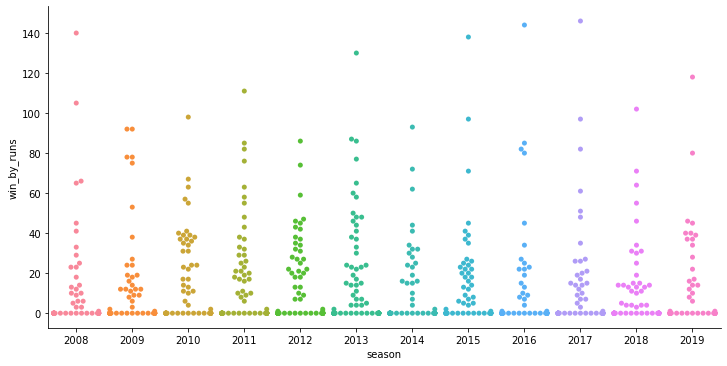

In [33]:
sns.catplot(x = 'season', y = 'win_by_runs', data = df, aspect = 2, kind = 'swarm')

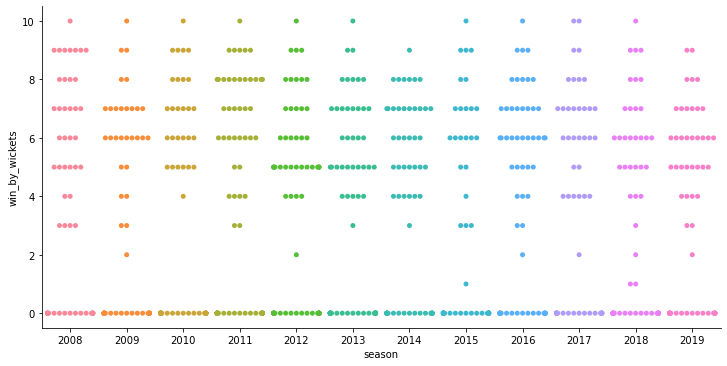

In [34]:
sns.catplot(x = 'season', y = 'win_by_wickets', data = df, aspect = 2, kind = 'swarm')

# Ball by Ball Analysis

In [36]:
df = pd.read_csv('deliveries.csv', index_col = 'match_id')
df.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [37]:
df.shape

(179078, 20)

In [41]:
# top 20 players who faced most number of balls
df['batsman'].value_counts()[:20].iplot(kind = 'bar')

In [42]:
# top 20 players who bowler most number of balls
df['bowler'].value_counts()[:20].iplot(kind = 'bar')

In [43]:
# top 20 Batsman who was non striker most of the time
df['non_striker'].value_counts()[:20].iplot(kind = 'bar')

In [47]:
runs = df.groupby('batting_team')[['batsman_runs', 'total_runs']].sum()
runs.head()

,batsman_runs,total_runs
batting_team,,
Chennai Super Kings,25104,26418
Deccan Chargers,10885,11463
Delhi Capitals,2530,2630
Delhi Daredevils,23115,24388
Gujarat Lions,4629,4862


In [48]:
runs.iplot(kind = 'bar')

In [53]:
batsman = df.groupby('batsman')['batsman_runs'].sum()
batsman = batsman.sort_values(ascending = False)
batsman

batsman
V Kohli         5434
SK Raina        5415
RG Sharma       4914
DA Warner       4741
S Dhawan        4632
                ... 
J Denly            0
C Nanda            0
RR Bhatkal         0
K Ahmed            0
Abdur Razzak       0
Name: batsman_runs, Length: 516, dtype: int64

In [55]:
batsman[:20].iplot(kind = 'bar')

In [58]:
df['player_dismissed'].value_counts()[:20].iplot(kind = 'bar')

In [60]:
df['dismissal_kind'].value_counts().iplot(kind = 'bar')